In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0
true['label'] = 1

df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,OOPS: Trump’s Hotel Offers Qurans And Is Furn...,Donald Trump wanted the press to tour his bran...,News,"September 16, 2016",0
1,Russian opposition leader's fraud conviction a...,"STRASBOURG, France (Reuters) - Europe s top hu...",worldnews,"October 17, 2017",1
2,DEMOCRAT SENATOR Reprimanded For Comparing Fem...,A Democratic Senator tried to compare Trump no...,politics,"Nov 29, 2017",0
3,"Factbox: Who are Britain First, whose leader's...",LONDON (Reuters) - U.S. President Donald Trump...,worldnews,"November 29, 2017",1
4,Icahn tapped as Trump's special adviser on reg...,(Reuters) - Billionaire Carl Icahn will advise...,politicsNews,"December 21, 2016",1


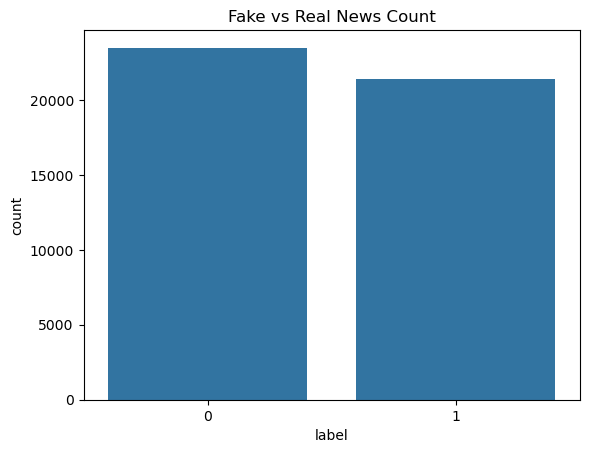

In [3]:
sns.countplot(data=df, x='label')
plt.title("Fake vs Real News Count")
plt.show()

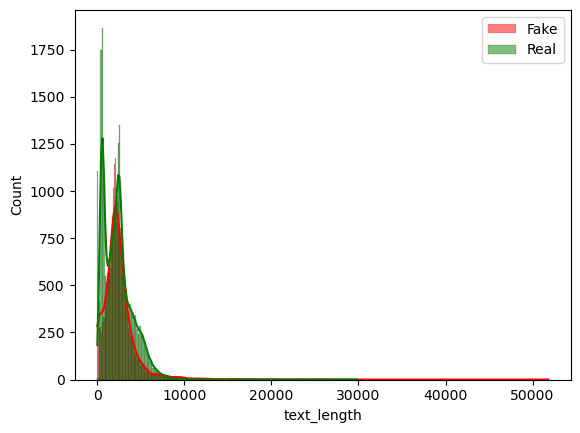

In [4]:
df['text_length'] = df['text'].apply(len)

sns.histplot(df[df.label==0]['text_length'], color='red', label='Fake', kde=True)
sns.histplot(df[df.label==1]['text_length'], color='green', label='Real', kde=True)
plt.legend()
plt.show()

In [5]:
import re
import string
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [6]:
df["text"] = df["text"].apply(wordopt)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

In [8]:
tfidf = TfidfVectorizer(max_df=0.7)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [9]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9846325167037862


In [10]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.9356347438752785


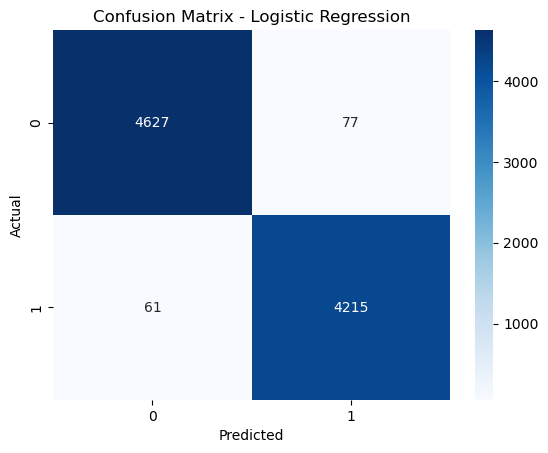

In [11]:
cm = confusion_matrix(y_test, lr_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4704
           1       0.98      0.99      0.98      4276

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [13]:
feature_names = np.array(tfidf.get_feature_names_out())
coef = lr.coef_[0]

top_fake = feature_names[np.argsort(coef)[:20]]
top_real = feature_names[np.argsort(coef)[-20:]]

print("Fake News Indicator Words:\n", top_fake)
print("\nReal News Indicator Words:\n", top_real)

Fake News Indicator Words:
 ['via' 'us' 'this' 'read' 'image' 'featured' 'com' 'gop' 'just' 'hillary'
 'mr' 'even' 'watch' 'pic' 'america' 'here' 'getty' 'obama' 'you' 'these']

Real News Indicator Words:
 ['year' 'democratic' 'ly' 'its' 'reporters' 'comment' 'presidential'
 'spokesman' 'nov' 'statement' 'minister' 'monday' 'had' 'friday'
 'republican' 'tuesday' 'thursday' 'wednesday' 'washington' 'reuters']


In [14]:
import random

rand_index = random.randint(0, len(X_test) - 1)

random_text = X_test.iloc[rand_index]
actual = y_test.iloc[rand_index]

print("\nRANDOM NEWS FROM TEST SET:\n")
print(random_text)

test_vec = tfidf.transform([random_text])
prediction = lr.predict(test_vec)[0]

pred_label = "REAL" if prediction == 1 else "FAKE"
actual_label = "REAL" if actual == 1 else "FAKE"

print("\n🔮 MODEL PREDICTION:", pred_label)
print("✅ ACTUAL LABEL:", actual_label)


RANDOM NEWS FROM TEST SET:

wow  the people of california might lose the right to vote on taxes  only in california would this even be a possibility last week the california supreme court agreed to hear a case that could determine whether the right to vote on local taxes  which is constitutionally guaranteed by both propositions  and   will cease to exist the case  california cannabis coalition v  city of upland  at first glance seems limited to a narrow technical question  when a local initiative seeks to impose a new tax  does the issue need to be put to the voters at the next general election or can the proponents  relying on other laws  force a special election  but in answering that question  the lower court ruled that taxes proposed by initiative are exempt from the taxpayer protections contained in the state constitution  such as the provision dictating the timing of the election the howard jarvis taxpayers association  hjta   which filed the petition seeking supreme court revi